In [33]:
import matplotlib.pyplot as plt
#import pandas as pd
import networkx as nx
import json as js
from collections import Counter
import community 


path = "./all_datas.json"

In [2]:
#Graph creation
json_datas = None

with open(path) as f:
    f_toStr = f.read()

json_datas = js.loads(f_toStr)

G = nx.node_link_graph(json_datas)



In [ ]:
#Largest component
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)
largest_component = G.subgraph(core_nodes).copy()
core_degree_sequence = sorted([d for n, d in largest_component.degree()], reverse=True)  # degree sequence



In [3]:
#generic analysis
print(G)
print(largest_component)


Graph with 24568 nodes and 19898 edges


In [4]:
#distances analysis (ci metterà una vita, la giant component richiederà ore)

#distances_sum = 0
#all_p = []
#for C in (G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)):
#    p = dict(nx.shortest_path_length(C)) #questo conterrà tutte le distanze, per poter guardare max, min e media
#    all_p.append(p)
#    distance = nx.average_shortest_path_length(C)
#    print(distance)
#    distances_sum += distance

#print("Average distance: ", distances_sum/len(nx.connected_components(G)))
#print("Max distance: ", max(p.values() for p in all_p))
#print("Min distance: ", min(p.values() for p in all_p))
#with open('measures.txt', 'w') as f:
#    print(f"distance sum: {distances_sum}\n", file=f)
#    print(all_p, file=f)
    

In [25]:
#clustering coefficient
print("Clustering coefficient: "+str(nx.average_clustering(G)))
print("Clustering coefficient ls: "+str(nx.average_clustering(largest_component)))


Clustering coefficient: 0.07238913055844667
Clustering coefficient ls: 0.2962252731973584


Il grafo è connesso? False
Componenti connesse: 18082
largest connected component size: 5538


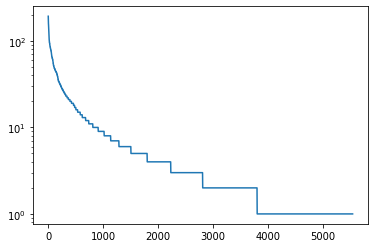

In [6]:
#largest connected component
print("Il grafo è connesso? "+str(nx.is_connected(G)))
print("Componenti connesse: "+ str(nx.number_connected_components(G)))
print("largest connected component size: {len(core_nodes)}")
#print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

#analizzo i degree all'interno della sola largest connected components per scoprire se la sua dimensione è dovuta a molti nodi che si incontrano oppure a supernodi Hub
plt.yscale('log')
plt.plot(core_degree_sequence)
#nx.draw(core, with_labels=True)

average degree: 1.6198306740475414
17443
degree sequence: [193, 178, 172, 166, 157, 155, 149, 141, 138, 133, 132, 117, 109, 109, 109, 107, 106, 104, 101, 99, 97, 97, 97, 95, 94, 94, 93, 93, 92, 90, 88, 88, 86, 86, 86, 85, 84, 84, 84, 83, 83, 82, 82, 80, 80, 79, 79, 79, 78, 78, 77, 77, 77, 76, 76, 74, 74, 73, 72, 69, 69, 68, 68, 67, 67, 66, 66, 65, 65, 64, 64, 64, 63, 63, 63, 63, 62, 61, 61, 61, 61, 61, 61, 60, 60, 58, 58, 58, 57, 56, 55, 55, 54, 54, 53, 53, 52, 52, 52, 51]


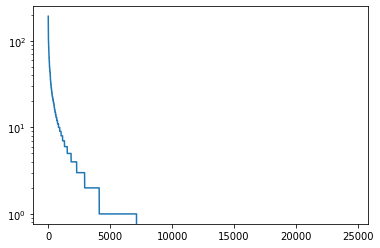

In [7]:
#degree analysis
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(degree_sequence)

print("average degree: " + str(sum(degree_sequence)/len(degree_sequence)))
#wtf? average degree 7?
print(degree_sequence.count(min(degree_sequence)))
#ah, ecco perchè.

print("degree sequence: " + str(degree_sequence[0:100]))

In [8]:
#Degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))

Degree correlation: 0.15331144700307114
Degree correlation: 0.12291294299635477


Largest component
51
G
18129


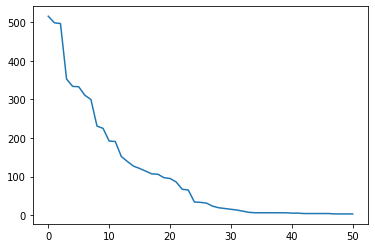

In [36]:
#community detection
largest_component_communities = community.community_louvain.best_partition(largest_component)
G_communities = community.community_louvain.best_partition(G)
# number of communities
#print(Counter(communities.values()))
counter_lc = Counter(largest_component_communities.values())
counter_G = Counter(G_communities.values())
print("Largest component")
#print(counter_lc)
print(len(counter_lc))
print("G")
#print(counter_G)
print(len(counter_G))
plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#per ignorare quelle da due è meglio valutare solo la largest_component


'si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c\'è un cluster di comunità che fungono da "intermediari"\ntra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.\n'

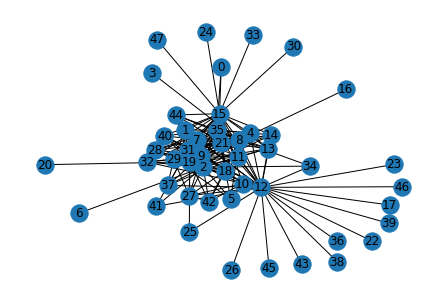

In [18]:
#plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#TODO: aggiustare la dimensione dell'immagine, se si decommenta la linea precedente il grafo delle comunità diventa un amoung us
#per ignorare quelle da due è meglio valutare solo la largest_component
induced_graph = community.induced_graph(largest_component_communities, largest_component, weight='WEIGHT')
induced_graph.remove_edges_from(nx.selfloop_edges(induced_graph))

nx.draw(induced_graph, with_labels=True, pos=nx.spring_layout(induced_graph))
'''si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c'è un cluster di comunità che fungono da "intermediari"
tra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.
'''

In [55]:
#centrality analysis
#troppo grande per nx.closeness_centrality(G)
#print(nx.closeness_centrality(G))
betw_dict = nx.betweenness_centrality(G,k=100).values()

betw = sum(betw_dict)/len(G)
print("betweenness centrality: "+str(betw))
#sarebbe interessante valutare la betwenness di alcuni nodi particolari
betw_list = list(betw_dict)
betw_list.sort(reverse=True)
len_betw_list = len(betw_dict)
print(len_betw_list)
print(betw_list[0:10])
i =  0
for b  in betw_list:
    if b==0.0:
        i+=1

print(i)
print(len_betw_list-i)

betweenness centrality: 1.1320900930104628e-05
24568
[0.004906316117126723, 0.004800101366260813, 0.004785027135287432, 0.003663383845471955, 0.0034471724103607025, 0.002850588162777754, 0.0028092785358005317, 0.0026965616331517837, 0.002605132965274799, 0.0025501466405451353]
21735
